# Importing Required Modules

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from gensim.models import Word2Vec 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
import re 
from gensim.models import Word2Vec 
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\akhila\\OneDrive\\Desktop\\codsoft\\Genre Classification Dataset\\train_data.txt",sep=':::',names=['Title','Genre','Description'],engine='python')
print(df.head())

                                Title       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


# Data Preprocessing

In [4]:
#data cleaning
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
print(df.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [5]:
data = df.dropna()
corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
word2vec_model = Word2Vec(corpus, vector_size=50, window=5, min_count=5, workers=4)


def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 50


data["embeddings"] = data["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(data["embeddings"].to_list())


label_encoder = LabelEncoder()
data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
y = data["genre_encoded"]

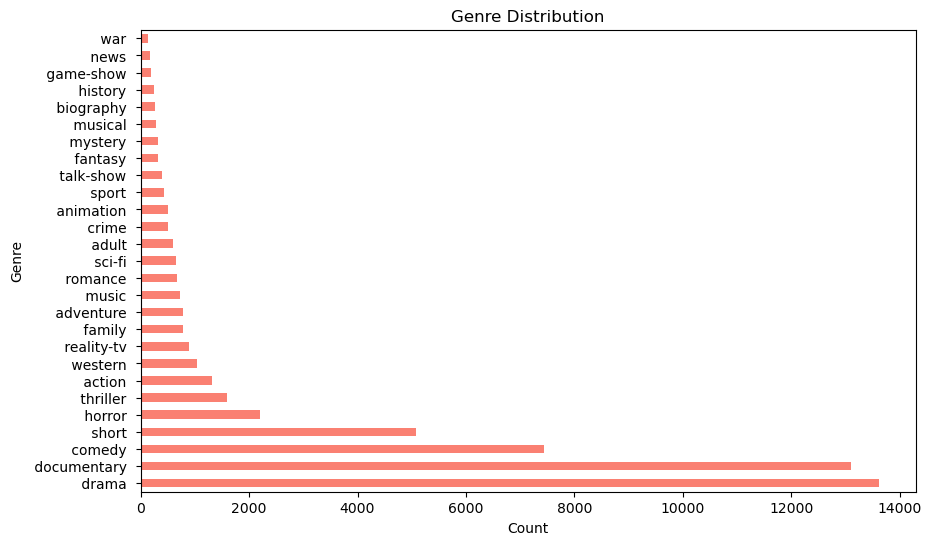

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Get the genre counts
genre_counts = data["Genre"].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="barh", color="salmon")
plt.ylabel("Genre")
plt.xlabel("Count")
plt.title("Genre Distribution")
plt.show()



# Traing and Testing

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Split dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(train_data['Description'])
X_test = tfidf_vectorizer.transform(test_data['Description'])
# Convert genres to numerical labels
gmap = {genre: idx for idx, genre in enumerate(data['Genre'].unique())}
train_data['Genre_encoded'] = train_data['Genre'].map(gmap)
test_data['Genre_encoded'] = test_data['Genre'].map(gmap)
ytrain = train_data['Genre_encoded']
y_test = test_data['Genre_encoded']
# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, ytrain)
# Predict genres on the test set
y_pred = naive_bayes_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
from warnings import simplefilter
from sklearn.exceptions import UndefinedMetricWarning
simplefilter("ignore", category=UndefinedMetricWarning)
classification_rep = classification_report(y_test, y_pred, target_names=gmap.keys(),zero_division=0)
print("Classification Report:\n", classification_rep)

Accuracy: 52.31946878170248
Classification Report:
                precision    recall  f1-score   support

       drama        0.46      0.83      0.59      2697
    thriller        0.23      0.01      0.02       309
       adult        0.88      0.06      0.12       112
 documentary        0.58      0.88      0.70      2659
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
  reality-tv        0.80      0.02      0.04       192
      horror        0.73      0.36      0.48       431
       sport        0.73      0.09      0.15        93
   animation        0.00      0.00      0.00       104
      action        0.58      0.08      0.14       263
     fantasy        0.00      0.00      0.00        74
       short        0.60      0.10      0.18      1045
      sci-fi        0.86      0.04      0.08       143
       music        0.77      0.12      0.20       144
   adventure        0.29      0.03      0.05       139
   talk-show

In [9]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Description'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])
# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X, y)
# Input plot summaries for prediction
new_plot_summaries = [
"A group of friends embark on an adventurous journey to save the world.",
"In a post-apocalyptic world, a hero emerges to restore hope.",
"a man loves his life - his car, his apartment, his job, but especially his girlfriend"]

# Vectorize the input plot summaries
Xnew = tfidf_vectorizer.transform(new_plot_summaries)
# Predict the genres
predict_genre_encoded = naive_bayes_classifier.predict(Xnew)
predicted_genres = label_encoder.inverse_transform(predict_genre_encoded)
for plot_summary, predicted_genre in zip(new_plot_summaries, predicted_genres):
    print("Input Plot Summary:", plot_summary)
    print("Predicted Genre:", predicted_genre)
    print()

Input Plot Summary: A group of friends embark on an adventurous journey to save the world.
Predicted Genre:  drama 

Input Plot Summary: In a post-apocalyptic world, a hero emerges to restore hope.
Predicted Genre:  documentary 

Input Plot Summary: a man loves his life - his car, his apartment, his job, but especially his girlfriend
Predicted Genre:  drama 

